# **Regression Project: Boston House Price Prediction**

# **Marks: 60**

Welcome to the project on regression. We will use the **Boston house price dataset** for this project.

-------------------------------
## **Objective**
-------------------------------

The problem at hand is to **predict the housing prices of a town or a suburb based on the features of the locality provided to us**. In the process, we need to **identify the most important features affecting the price of the house**. We need to employ techniques of data preprocessing and build a linear regression model that predicts the prices for the unseen data.

----------------------------
## **Dataset**
---------------------------

Each record in the database describes a house in Boston suburb or town. The data was drawn from the Boston Standard Metropolitan Statistical Area (SMSA) in 1970. Detailed attribute information can be found below:

Attribute Information:

- **CRIM:** Per capita crime rate by town
- **ZN:** Proportion of residential land zoned for lots over 25,000 sq.ft.
- **INDUS:** Proportion of non-retail business acres per town
- **CHAS:** Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- **NOX:** Nitric Oxide concentration (parts per 10 million)
- **RM:** The average number of rooms per dwelling
- **AGE:** Proportion of owner-occupied units built before 1940
- **DIS:** Weighted distances to five Boston employment centers
- **RAD:** Index of accessibility to radial highways
- **TAX:** Full-value property-tax rate per 10,000 dollars
- **PTRATIO:** Pupil-teacher ratio by town
- **LSTAT:** % lower status of the population
- **MEDV:** Median value of owner-occupied homes in 1000 dollars

## **Importing the necessary libraries**

In [324]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# import libraries for linear regression model
from statsmodels.formula.api import ols
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor

#import librariries to encode categorical variables
from sklearn.preprocessing import LabelEncoder

#import library to tune the model
from sklearn.model_selection import GridSearchCV

#Ti check model performance
from sklearn.metrics import make_scorer,mean_squared_error, r2_score, mean_absolute_error

# import libraries for scaling the data
from sklearn.preprocessing import MinMaxScaler

# import libraries to ignore warnings
import warnings
warnings.filterwarnings('ignore')

### Loading the dataset

In [325]:
# read the data
#Step 1: The data file is in google drive. To mount the drive on google colab
from google.colab import drive
drive.mount('/content/drive')
#Step 2 : Read appropriate csv file from the mounted drive
df = pd.read_csv('/content/drive/My Drive/Python/Boston.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [326]:
#to copy the data, so that orginal data is not manipulated
data_new=df.copy()
# return the data frame stored in the label data_new. I will be using data_new from now on to perform the analysis.
# To see the first 5 rows

print("The first 5 rows of the copied data is given below", "\n")
data_new.head(5)

The first 5 rows of the copied data is given below 



,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


## Data Overview

- Observations
- Sanity checks

In [327]:
# Use the shape functionality to get the number of rows and columns in a data frame
data_new.shape

(506, 13)

In [328]:
# Use info() to print a concise summary of the DataFrame
data_new.info()
#general code to print the type and corresponding column name for any dataframe
#step1: To extract names of all existing datatype, unique functionality is used so that its not repeated
datatype=data_new.dtypes.unique()

#step2 To create an array corresponding to number of unique data types
i=list(range(0,len(datatype)))

#To append columns of unique data types in the order of array we use for loop
a=[] #datatype appended to a
for c in i:
  a.append(list(data_new.select_dtypes(datatype[c])))
  print("The columns in boston house price data that corresponds to type",datatype[c],"is",a[c],"\n")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 51.5 KB
The columns in boston house price data that corresponds to type float64 is ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'PTRATIO', 'LSTAT', 'MEDV'] 

The columns in boston house price data that corresponds to type int64 is ['CHAS', 'RAD', 'TAX'] 



In [329]:
print("The sum of duplicated rows are",data_new.duplicated().sum())
print("-"*50)
column = ["CHAS","RAD"]

for name in column:
  print(data_new[name].value_counts(1))
  print("-"*50)

The sum of duplicated rows are 0
--------------------------------------------------
0    0.93083
1    0.06917
Name: CHAS, dtype: float64
--------------------------------------------------
24    0.260870
5     0.227273
4     0.217391
3     0.075099
6     0.051383
2     0.047431
8     0.047431
1     0.039526
7     0.033597
Name: RAD, dtype: float64
--------------------------------------------------


In [330]:
#To get the average, minimum and maximum of all suitable columns
display(data_new.describe().T)

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


### Observations :
* There are no duplicated values
* There are no null values in the data.
* The data type belogs to int and float type, but an important point to note is that, some of the float/int values can be considered as categorical variables.
* CHAS, is a binary variable 1 or 0, depending upon if the town shares border with the Charles River.
* RAD can be considered as a categorical variable, and we can categorize all houses under a particular index and see how housing price, but at the same time perform a heat map, considering it as a numerical variable.
* MEDV will be our target variable, and others the independent variable.
* There is a minimum tax of 187 dollars for any property.
* The maximum per capita crime rate repoerted in a town is 88.9%. It would be interesting to see how housing price is effected in this town, usually we expect a low rate.
* The minimum housing price is 5000 dollars, and the maximum is 50000$. It would be interesting ot see the features just for minimum and maximum price just to get a vague idea on what might be affecting.
* It is interesting to note that, there is a twon in which all the owner occupied house are built before 1940. We can expect the housing price in that town to be higher due to traditional value or lower due to degraded quality over time

In [331]:
#To check some of the observation
#To find the features of maximum and minimum MEDV price
data_new[data_new["MEDV"]==min(data_new["MEDV"])]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
398,38.3518,0.0,18.1,0,0.693,5.453,100.0,1.4896,24,666,20.2,30.59,5.0
405,67.9208,0.0,18.1,0,0.693,5.683,100.0,1.4254,24,666,20.2,22.98,5.0


In [332]:
#To find the features of maximum and minimum MEDV price
data_new[data_new["MEDV"]==max(data_new["MEDV"])]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
161,1.46336,0.0,19.58,0,0.6050,7.489,90.8,1.9709,5,403,14.7,1.73,50.0
162,1.83377,0.0,19.58,1,0.6050,7.802,98.2,2.0407,5,403,14.7,1.92,50.0
163,1.51902,0.0,19.58,1,0.6050,8.375,93.9,2.1620,5,403,14.7,3.32,50.0
166,2.01019,0.0,19.58,0,0.6050,7.929,96.2,2.0459,5,403,14.7,3.70,50.0
186,0.05602,0.0,2.46,0,0.4880,7.831,53.6,3.1992,3,193,17.8,4.45,50.0
195,0.01381,80.0,0.46,0,0.4220,7.875,32.0,5.6484,4,255,14.4,2.97,50.0
204,0.02009,95.0,2.68,0,0.4161,8.034,31.9,5.1180,4,224,14.7,2.88,50.0
225,0.52693,0.0,6.20,0,0.5040,8.725,83.0,2.8944,8,307,17.4,4.63,50.0
257,0.61154,20.0,3.97,0,0.6470,8.704,86.9,1.8010,5,264,13.0,5.12,50.0
267,0.57834,20.0,3.97,0,0.5750,8.297,67.0,2.4216,5,264,13.0,7.44,50.0


In [333]:
#To find the features of maximum and minimum MEDV price
data_new[data_new["CRIM"]==max(data_new["CRIM"])]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
380,88.9762,0.0,18.1,0,0.671,6.968,91.9,1.4165,24,666,20.2,17.21,10.4


Based on intial analysis we can say that, though EDA is required to understand how ZN, INDUS, CHAS, NOX, RM, AGE, DIS, RAD, TAX, PTRATION, it is quite evident that crime rate would effect the price of house, as the crime rate for lowest price houses are higher than 38%. The higher crime rate, add to the increase no of LSTAT, as when there is increased struggle for money, people might go for theft and burgalry. The age of house in this particular area, informs that no much development in to industries or huge company has occurred in this area, also no much development into the town infrastructure has occurred in this area. The high LSTAT could be due to the fact the people were not able to afford to live in the developed regions, rather they had to move to less developed area, increasing the proporiton there.  Sometime old houses can have traditional value given good maintenence, but there is also a high possibilty of people will have to spend more money for renovation for old houses, reducing the demand and less housing price.

We can also see that, towns with high ZN has less crime rate. Companies light select area of less crime rate to build apartment complexes.


## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions:**

1. What does the distribution of 'MEDV' look like?
2. What can we infer form the correlation heatmap? Is there correlation between the dependent and independent variables?
3. What are all the inferences that can be found by doing univariate analysis for different variables?
4. Do bivariate analysis to visualize the relationship between the features having significant correlations (>= 0.7 or <= -0.7)

## Univariate analysis

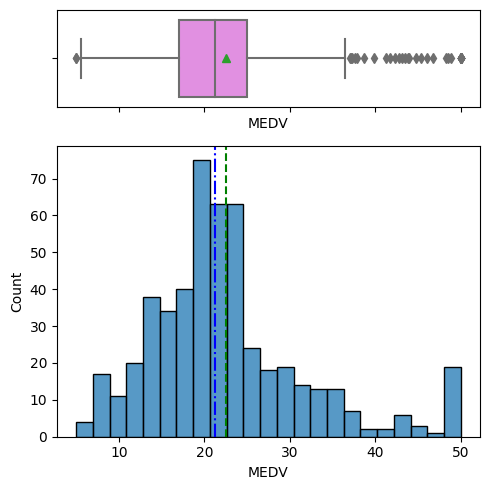

--------------------------------------------------------------------------------


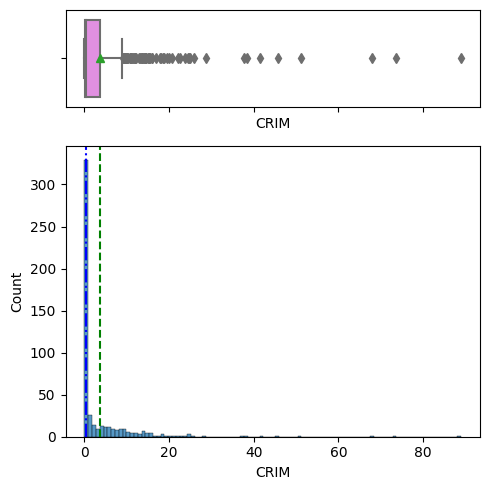

--------------------------------------------------------------------------------


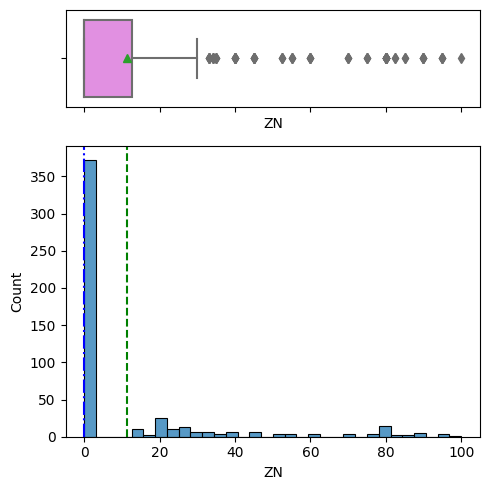

--------------------------------------------------------------------------------


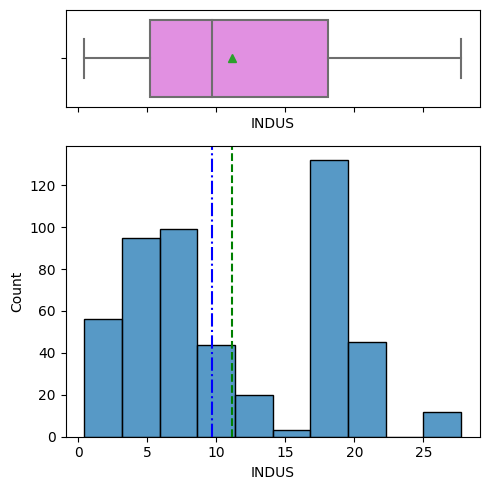

--------------------------------------------------------------------------------


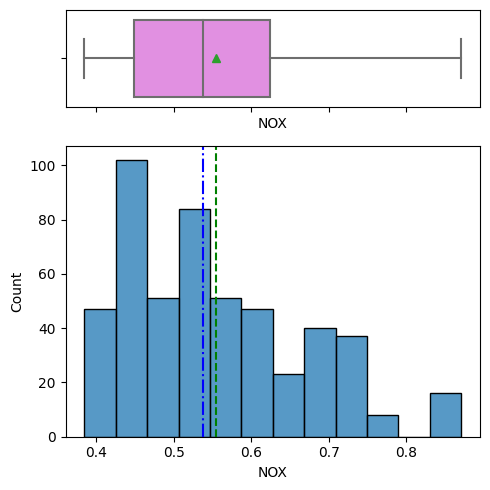

--------------------------------------------------------------------------------


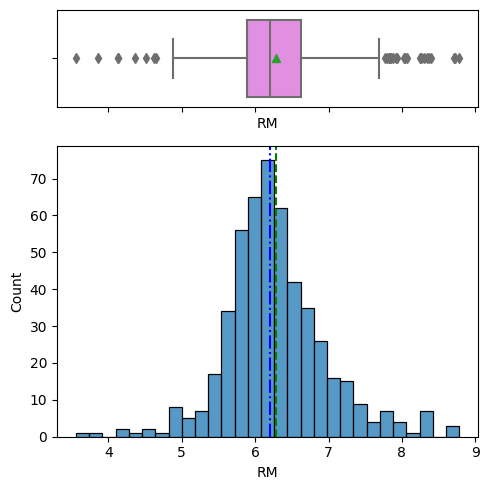

--------------------------------------------------------------------------------


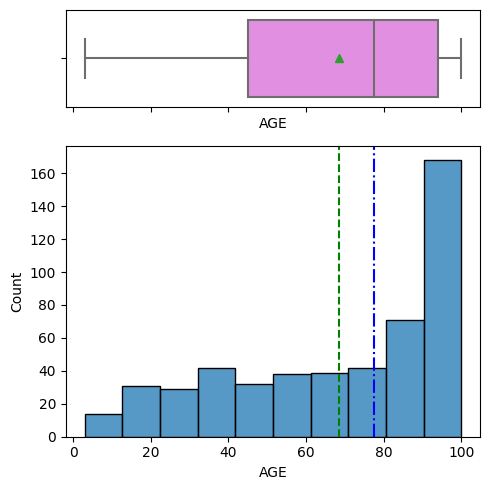

--------------------------------------------------------------------------------


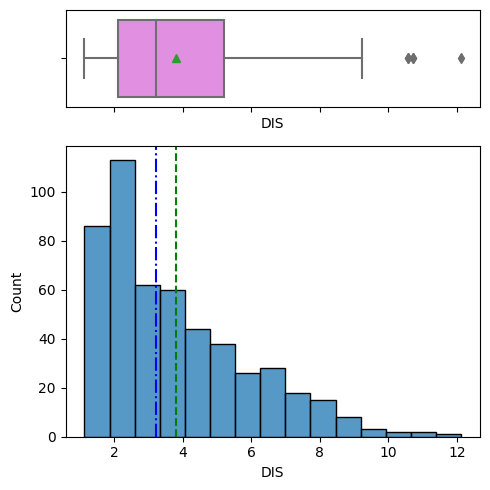

--------------------------------------------------------------------------------


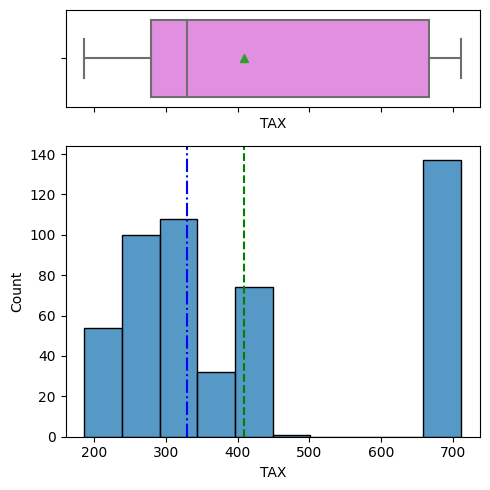

--------------------------------------------------------------------------------


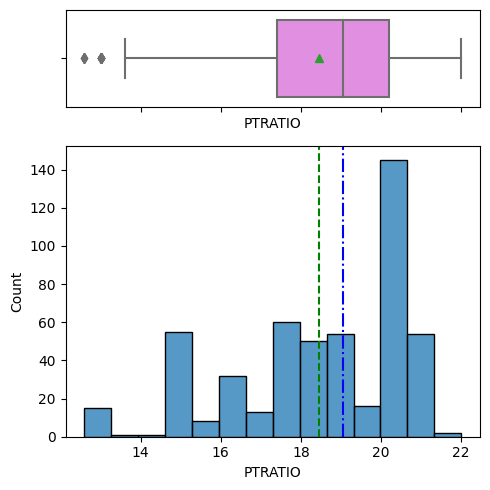

--------------------------------------------------------------------------------


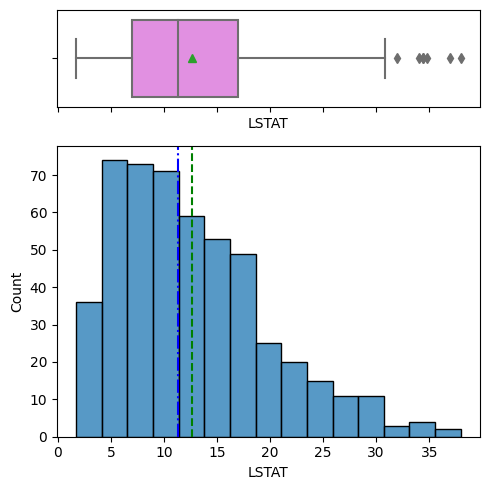

--------------------------------------------------------------------------------


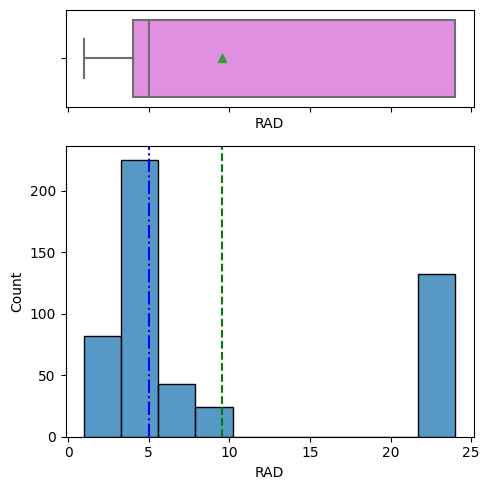

--------------------------------------------------------------------------------


In [334]:
#Reference for hist_box_fun : Fanatsy Sports practice case study
#Here I am defining a function to plot histogram and box plot for numercal variable together
def hist_box_fun(data_new,feature,kde=False):
 fig, ax=plt.subplots(2,1,sharex=True,gridspec_kw={'height_ratios':(1,3)},figsize=(5,5))
 sns.boxplot(data=data_new,x=feature,showmeans=True,color='violet',ax=ax[0])
 sns.histplot(data=data_new,x=feature,kde=kde,ax=ax[1])
 ax[1].axvline(data_new[feature].mean(),linestyle='--',color='green')
 ax[1].axvline(data_new[feature].median(),linestyle='-.',color='blue')

column = ["MEDV","CRIM","ZN","INDUS","NOX","RM","AGE","DIS","TAX","PTRATIO","LSTAT","RAD"]

for name in column:
    hist_box_fun(data_new, name)



    plt.tight_layout()     #To avoid overlap of ticklabels


    plt.show()             # To display the plots
    print("--------------------------------------------------------------------------------")




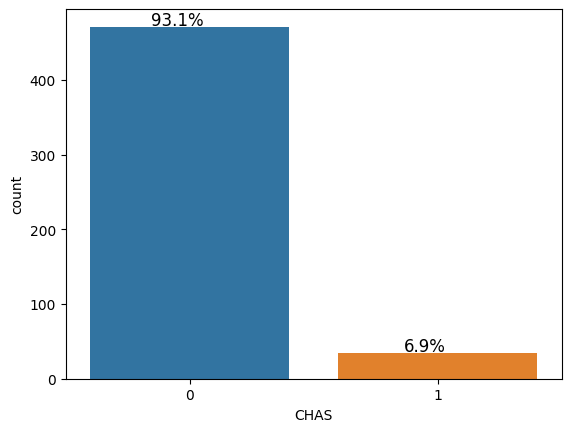

In [335]:
axes=sns.countplot(data=data_new,x="CHAS")
for i in axes.patches:
        percentage = '{:.1f}%'.format(100 * i.get_height() / len(data_new["CHAS"]))  # Percentage of each bin
        x = i.get_x() + i.get_width() / 2 - 0.05                     # Width of the plot
        y = i.get_height() + 1.5                                      # Height of the plot
        axes.annotate(percentage, (x, y), size=12, ha='center')       # Annotate the percentage


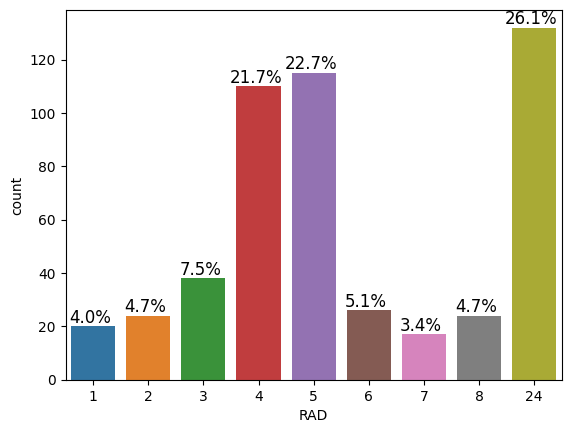

In [336]:
axes=sns.countplot(data=data_new,x="RAD")
for i in axes.patches:
        percentage = '{:.1f}%'.format(100 * i.get_height() / len(data_new["CHAS"]))  # Percentage of each bin
        x = i.get_x() + i.get_width() / 2 - 0.05                     # Width of the plot
        y = i.get_height() + 1.5                                      # Height of the plot
        axes.annotate(percentage, (x, y), size=12, ha='center')       # Annotate the percentage

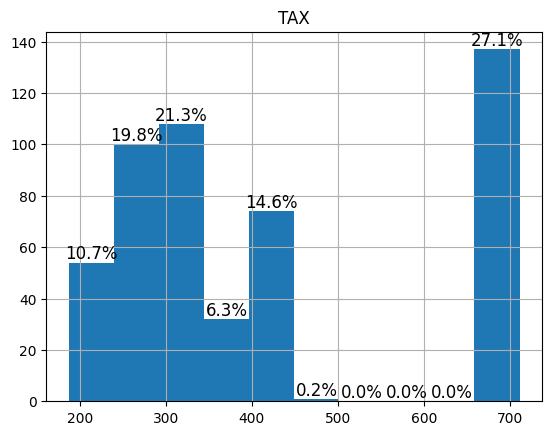

In [337]:
Total=len(data_new["TAX"])
axes=data_new.hist("TAX")
for ax in axes.flatten():                                                        #Returns multidimensional data frame converted to one dimensional series
    for i in ax.patches:                                                         #Returns each bin as patches
        percentage = '{:.1f}%'.format(100 * i.get_height() / Total)              #Returns Percentage of each bin
        x = i.get_x() + i.get_width() / 2 - 0.05                                 #To set Width of the plot
        y = i.get_height() + 1.5                                                 #To set Height of the plot
        ax.annotate(percentage, (x, y), size=12, ha='center')

## Observations from univariate analysis
Majority of the houses do not share border with the river. The accessibility to radial highways do not have values between 8 and 24,. Only 26% of houses have the highest accessibilty to radial highway i. e 24, rest of the houses have RAD less than or equal to 8.

For both TAX and RAD, we see there are no data with certain values, both has drastic jumps, rad with a jump from 8 to 24, and tax with a jump from 500 to approximately near around 700. We don't have house prices in this range. Approximately 26% of houses with highest RAD have higher tax. This could mean that, access to radial highways increase the tax of locality. For confirmation we need to see a heat map.

The crime rates is right skewed, the mean lies at around 3.6, with multiple numbers of large value outliers to the right. The most number of houses are in a locality with less crime rate (based on histogram), but there are smaller multiple sets of houses in high crime rate locality.

The number of rooms per dwelling has almost a perfect bell shape curve, also the house price rate though slightly right skewed, has a bell shape. It make sense, that there will be less number of houses with vere less rooms and a lot of rooms, as most people who look for housing are with families and they would want number of rooms that lie in an average of 6-7 (for example, 3 bedrooms, hall, kitchen, storeroom, or some combinations averaging to 6-7).The right skewness of house price could be due to factors like crime rate and age. We can expect a positive correlation between rooms per dwelling and housing price.

Majority of housing localities have zero proportion of residential land zoned for lots over 25,000. This means, where we can find lots greater than 25000 sq ft, are very few and should have some special features, which can be found based on bivariate analysis.

A proper bell shape is not found in INDUS, and NOX. Age is left skewed, indicating more number of houses that are older than 1940. The distance is slighlty right skewed, indicating the presence of more number of localities with less access to high companies. LSTAT is right skewed, indicatind more number of localities with less proportion of lower economic class people.

Overall we see, there are more number of houses in localities, with less proportion of lower economic class, less access to radial highway or TAX, less proportion of land owned by large residential zone greater than 25000 sq ft, less accessibility to big companies, which means away from big buisness cities.



## Bivariate Analysis

<Axes: >

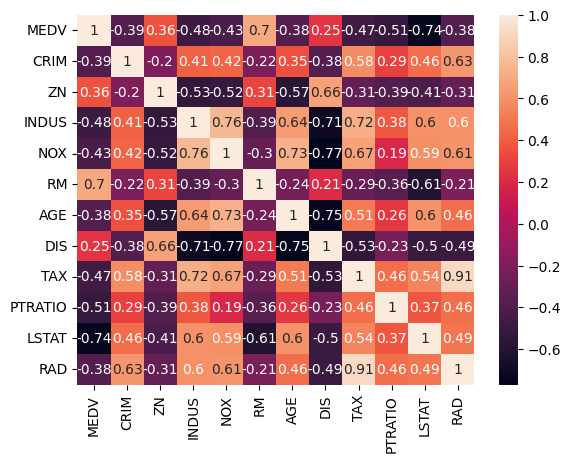

In [338]:
#First lets do a heat map, as it saves a lot of time, giving us an idea on correlations
sns.heatmap(data=data_new[["MEDV","CRIM","ZN","INDUS","NOX","RM","AGE","DIS","TAX","PTRATIO","LSTAT","RAD"]].corr(),annot=True)

MEDV has the highest negative correlation with LSTAT, it make sense, the house prices go down, in the area of lower economic class. As expected with increase in number of rooms, the housing price go higher. Increase in crime rate has a negative correlation of -0.39.

Distance to big companies is highly negatively correlated with AGE, NOX and INDUS.

Tax increases with more accessibilty to radial highways. Increase in tax has negative effect on house price. Though radial highways are convenient, the increased tax might make people choose other areas with less tax and less housing price, which could be why we see only 26% house in locality with high RAD (high TAX), rest all the houses with less RAD (less TAX).

Areas with a higher percentage of lower-status residents (LSTAT) may tend to have smaller and potentially more affordable dwellings (less MEDV) with fewer rooms (RM).

**Since there are multiple positive and negative correlated values, scatter plots selected few, will be made to explain the trends in detail.**



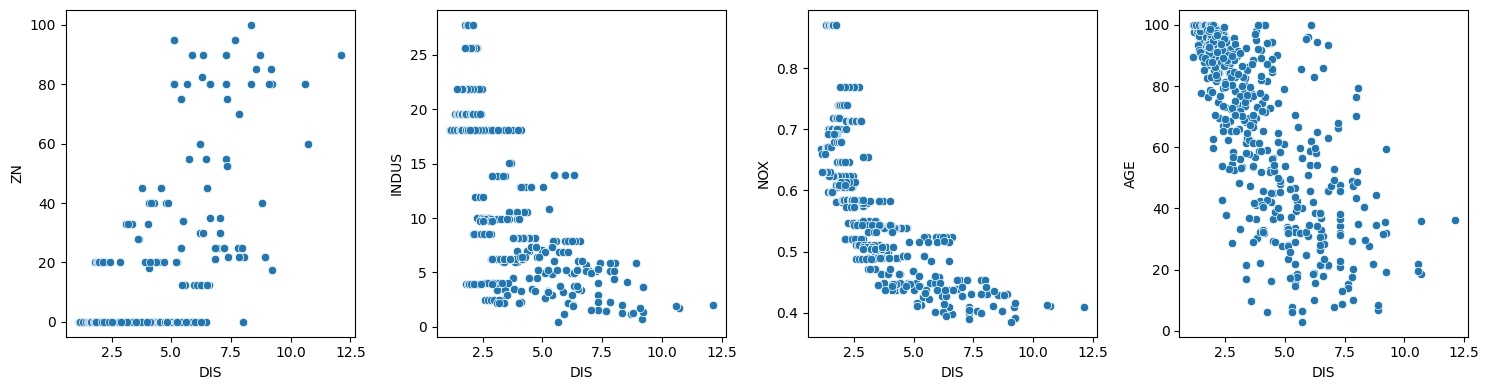

In [339]:
col=["ZN","INDUS","NOX","AGE"]

# Define the number of rows and columns for the subplots
rows = 1
cols = 4

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(15, 4))

# Flatten the axes array for easy iteration
axes = axes.flatten()

for i, name in enumerate(col):
    # Scatter plot for each variable
    sns.scatterplot(data=data_new, x='DIS', y=name, ax=axes[i])
    axes[i].set_xlabel("DIS")
    axes[i].set_ylabel(name)

# Adjust layout
plt.tight_layout()


# Display the plots
plt.show()



* Distance to big companies is negatively correlated with AGE, NOX and INDUS. A negative correlation with AGE could indicate a pattern of urban renewal. When an area is close to major employment centers, there is often higher economic activity and demand for housing. This can lead to new construction or renovations of existing buildings.

* Areas with larger residential lots (ZN) may tend to be located at a greater distance from major employment centers (DIS). This could indicate a pattern of suburban development, where larger plots of land are available further away from urban centers.

* NOX is less when DIS is high, probably due to less air pollution because of less vehicle and industrial activity.

* As the distance to employment centers (DIS) increases, the proportion of non-retail business acres (INDUS) tends to decrease. This could imply that non-retail businesses are more likely to be located closer to employment centers.





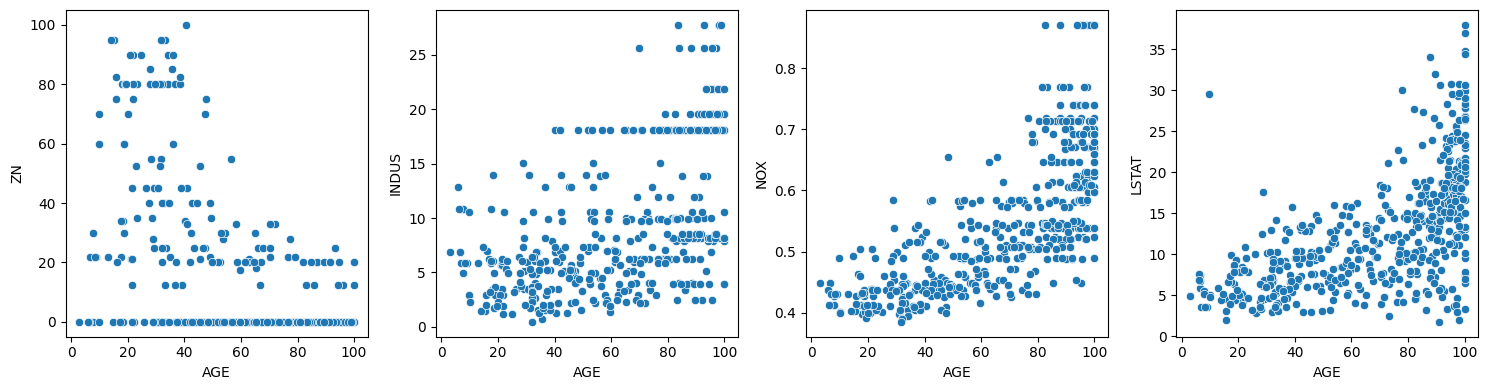

In [340]:
col=["ZN","INDUS","NOX","LSTAT"]

# Define the number of rows and columns for the subplots
rows = 1
cols = 4

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(15, 4))

# Flatten the axes array for easy iteration
axes = axes.flatten()

for i, name in enumerate(col):
    # Scatter plot for each variable
    sns.scatterplot(data=data_new, x='AGE', y=name, ax=axes[i])
    axes[i].set_xlabel("AGE")
    axes[i].set_ylabel(name)

# Adjust layout
plt.tight_layout()


# Display the plots
plt.show()

 * We can see AGE is positively correlated with NOX and INDUS. This is again due to the DIS factor, AGE increases with decreased weighted DIS to employment centers (increased urban activity and renovation), which means increased pollution (NOX) and increased non retail buisness (proximity to urban activity). Owing to this same reason we might expect less ZN, with increased AGE. Large residential zone tends to be in the suburbans (high DIS, less AGE).

 * Older housing units may be more affordable, attracting residents with lower socioeconomic status. This can lead to a positive correlation between LSTAT and the proportion of older housing units (AGE).

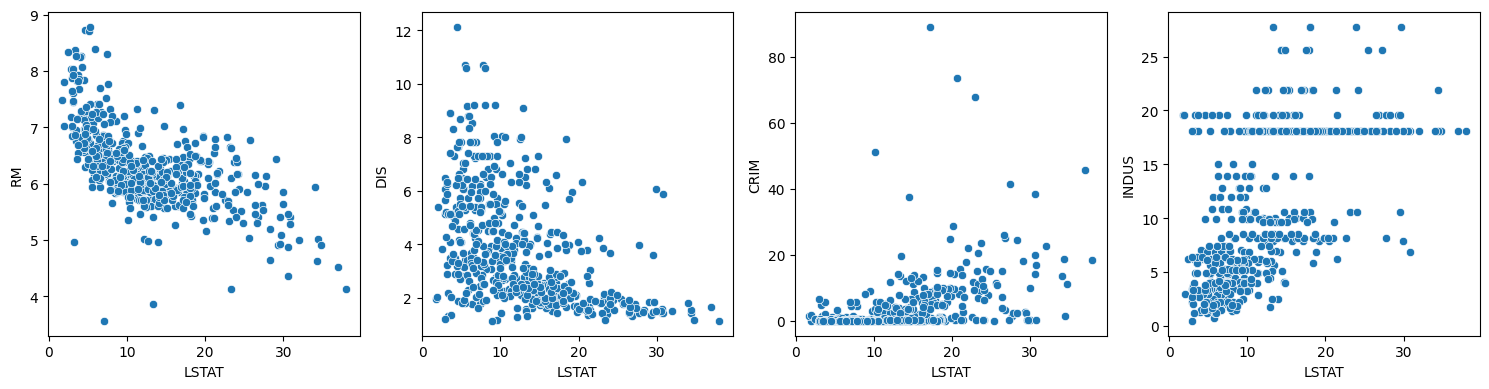

In [341]:
col=["RM","DIS","CRIM","INDUS"]

# Define the number of rows and columns for the subplots
rows = 1
cols = 4

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(15, 4))

# Flatten the axes array for easy iteration
axes = axes.flatten()

for i, name in enumerate(col):
    # Scatter plot for each variable
    sns.scatterplot(data=data_new, x='LSTAT', y=name, ax=axes[i])
    axes[i].set_xlabel("LSTAT")
    axes[i].set_ylabel(name)

# Adjust layout
plt.tight_layout()


# Display the plots
plt.show()

* LSTAT is negatively correlated with DIS. The proportion of lower economic people is high at lower weighted distance to employment centers. This could be due to the fact thaT, with increase in LSTAT, people go for older housing units may be more affordable. This can lead to a positive correlation between LSTAT and the proportion of older housing units (AGE). As we saw from the data, more old buildings are located at areas with less DIS, thus increased NOX and INDUS. Thus LSTAT has a positive correlation with NOX, INDUS and AGE.

* Crime rate is lower for LSTAT less than 10, but above 10 the crime rate is a mix of both high and low.

* With increase in LSTAT, people might go to lower priced houses with less rooms, hence a ngeative correlation between LSTAT and number of rooms.

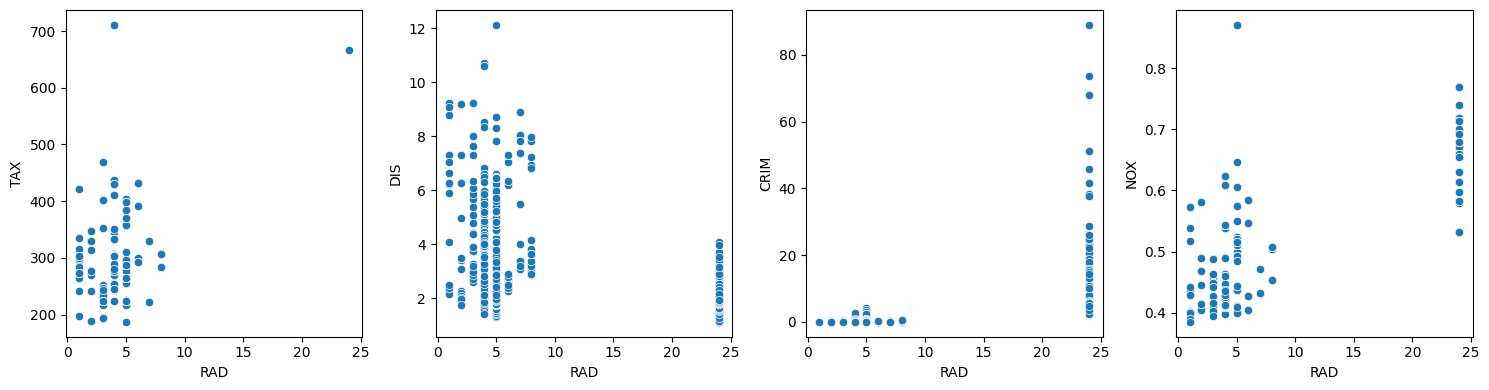

In [342]:
col=["TAX","DIS","CRIM","NOX"]

# Define the number of rows and columns for the subplots
rows = 1
cols = 4

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(15, 4))

# Flatten the axes array for easy iteration
axes = axes.flatten()

for i, name in enumerate(col):
    # Scatter plot for each variable
    sns.scatterplot(data=data_new, x='RAD', y=name, ax=axes[i])
    axes[i].set_xlabel("RAD")
    axes[i].set_ylabel(name)

# Adjust layout
plt.tight_layout()


# Display the plots
plt.show()

* Areas with high RAD, definitely has less weighthed distance to emplyment centers. Areas with lower rad has combination of both low and high DIS. As mention before TAX tend to increase with access to radial highways.  
* Interestingly crime rate is more in the area of access to radial high ways.
* The pollution is more at high RAD due to high vehicle activity

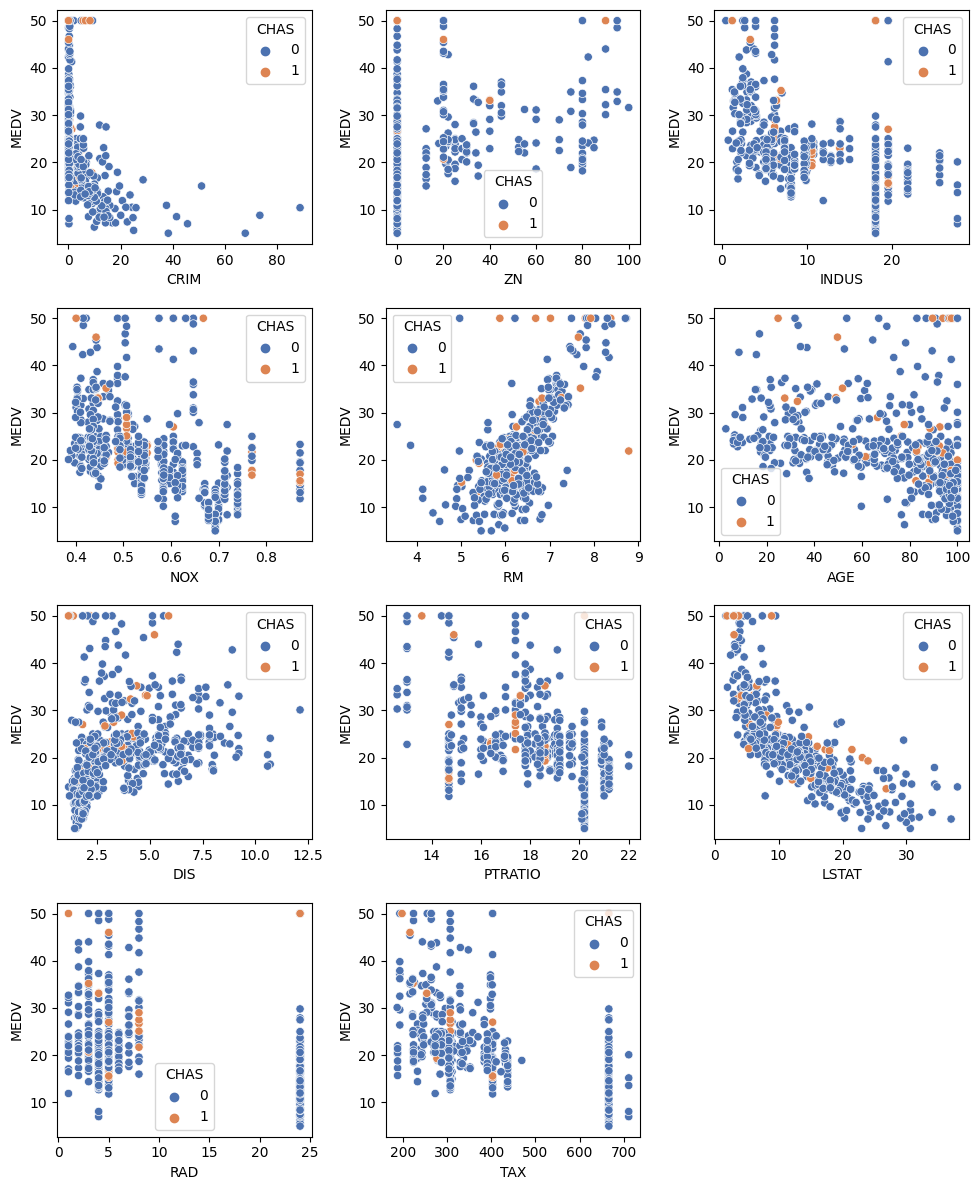

In [343]:
#Line plot to undersatnd relation between border shared with river, house price and LSTAT
col=["CRIM","ZN","INDUS","NOX","RM","AGE","DIS","PTRATIO","LSTAT","RAD","TAX"]

# Define the number of rows and columns for the subplots
rows = 4
cols = 3

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(10, 12))

# Flatten the axes array for easy iteration
axes = axes.flatten()

for i, name in enumerate(col):
    # Scatter plot for each variable
    sns.scatterplot(data=data_new, x=name, y='MEDV', hue='CHAS', palette='deep', ax=axes[i])
    axes[i].set_xlabel(name)
    axes[i].set_ylabel('MEDV')

# Adjust layout
plt.tight_layout()
fig.delaxes(axes[-1])

# Display the plots
plt.show()



If you see here, the RAD below 9, there is house price distribution over all the price range and same for rad>9.

## Bivariate analysis : Major Observations

In general there are less number of houses sharing border with river. For both cases with CHAS=0 and 1, price range of houses vary between 10000 and 50000 dollars. We don't see lowest priced houses at CHAS=1

For  CHAS=1, the DIS is less, means there are nearby employment centers. Probably the river runs through the city. Also the crime rate at CHAS=1 is less, this is most likely due to the less number of data points, thus we are not getting a clear picture. If we see CHAS=0, even for that there are more number of houses in less crime rated localities.

RAD and TAX has a bimodal distribution.


* High LSTAT (lower economic class) --> lower priced affordable house
 Increased RM (more rooms) --> price increases.
* High crime rate --> People do not prefer the area --> lower housing price
* High RAD--> High TAX due to radial highways -->lower house price

* High ZN --> Complexes located at suburbans (away from urban activity)--> More comfort due to less NOX, less INDUS, high DIS --> higher price

* AGE-- low AGE --> minimum price above 20000$
   -- high age --> High house price for some probably due to traditional value, and renovation, some has lower house price probably due to no well maintenene
* PTATIO -- Doesn't seem to have a trend with housing price

There is high chance of multicollinearity in this data, due to correlation between some of the independent variables among themselves.

## Data Preprocessing

- Missing value treatment
- Log transformation of dependent variable if skewed
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

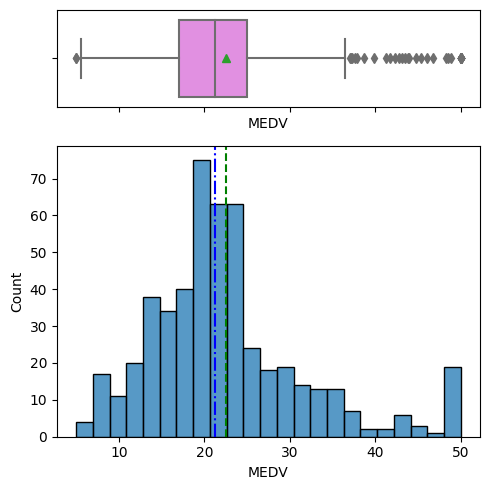

--------------------------------------------------------------------------------


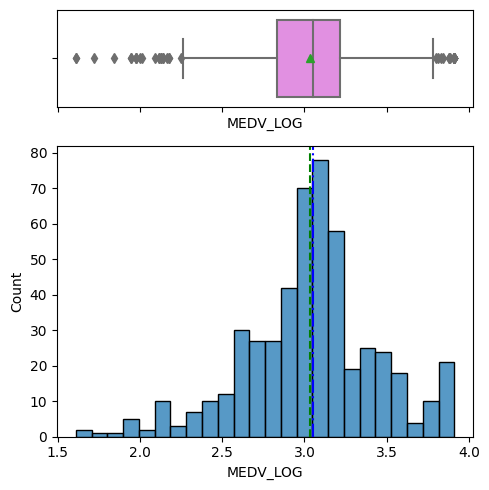

--------------------------------------------------------------------------------
Mean and Median of log transformed MEDV is  3.03 and  3.05
Mean and Median of MEDV is  22.53 and  21.2


In [344]:
#To seperate target and dependent variables
x=data_new.drop('MEDV',axis=1)  #Dropping MEDV, to get the set of independent variables
data_new_log=data_new.copy()    #To not modify the data_new

#As the MEDV is skewed slightly right, we need to log transform the variable.
data_new_log["MEDV_LOG"]=np.log(data_new_log['MEDV'])

y=data_new_log["MEDV_LOG"] # Seperated target variable

#To see the histogram of log transformed variable and compare it with non log transforemd one
column = ["MEDV","MEDV_LOG"]

for name in column:
    hist_box_fun(data_new_log, name)



    plt.tight_layout()     #To avoid overlap of ticklabels


    plt.show()             # To display the plots
    print("--------------------------------------------------------------------------------")
print("Mean and Median of log transformed MEDV is ",round(data_new_log["MEDV_LOG"].mean(),2),'and ',round(data_new_log["MEDV_LOG"].median(),2))
print("Mean and Median of MEDV is ",round(data_new_log["MEDV"].mean(),2),'and ',round(data_new_log["MEDV"].median(),2))

Here we can see for the log transformed MEDV, the mean and median are close to each other, varying in the second decimal places. Hence we will be taking the log transformed MEDV as target variable

In [345]:
#To divide to test and training data set
#Using train_test_split package, which randomly divide data in to 80% as train and 20% as test.
x_train, x_test, y_train, y_test =train_test_split(x, y, test_size=0.2, shuffle=True, random_state=1)

#To check if the split was right, we can check the matrix size
print("Size of x_train is ",x_train.shape)
print("Size of x_test is ",x_test.shape)

Size of x_train is  (404, 12)
Size of x_test is  (102, 12)


20% of the data is in the test set and 80% in the training set

In [346]:
#Lets scale the data
# We are using min-max scaler as compared to standard scaler, its less sensitive to outliers
#Scaling is important as it prevents one feature dominating due to different scale.
scaler=MinMaxScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_train_scaled=pd.DataFrame(x_train_scaled,index=x_train.index,columns=x_train.columns)

Not all outliers of the dependent variables, seem like an impossible or non physical value. For example, there are many outliers in crime rate, but we cannot remove them as from the scatter plot, we see housing price going down significanlty with increased crime rate. These higher housing prices above 40000 dollar tend to lie in the outlier.

There is one single value at price 50000 dollar for CHAS=1 and for RAD=24. The majority of house have lower price at RAD=24, and this one high value MEDV is little suspicious, could be an error. But right now we are not removing this point. There are too few data points for CHAS=1, which can be an issue.

No feature engineering will be done.
We have to remove some columns to eliminate multicollinearity.

## Model Building - Linear Regression

In [347]:
#Lets add the constant(intercept term in linear regression fit)
x_train_scaled=sm.add_constant(x_train_scaled)
x_train_scaled.head()

,const,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT
42,1.0,0.001519,0.00,0.236437,0.0,0.129630,0.499713,0.038105,0.417509,0.086957,0.087786,0.563830,0.112583
58,1.0,0.001665,0.25,0.171188,0.0,0.139918,0.495114,0.270855,0.607917,0.304348,0.185115,0.755319,0.141556
385,1.0,0.188890,0.00,0.646628,0.0,0.648148,0.328799,0.980433,0.026962,1.000000,0.914122,0.808511,0.802428
78,1.0,0.000564,0.00,0.453446,0.0,0.106996,0.511784,0.523172,0.353236,0.173913,0.402672,0.648936,0.292770
424,1.0,0.098750,0.00,0.646628,0.0,0.409465,0.383982,0.697219,0.084924,1.000000,0.914122,0.808511,0.425773


In [348]:
# Create the model
model1 = sm.OLS(y_train, x_train_scaled).fit()

# Get the model summary
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               MEDV_LOG   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.777
Method:                 Least Squares   F-statistic:                     117.8
Date:                Fri, 29 Sep 2023   Prob (F-statistic):          1.02e-121
Time:                        15:09:38   Log-Likelihood:                 101.65
No. Observations:                 404   AIC:                            -177.3
Df Residuals:                     391   BIC:                            -125.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.6765      0.091     40.216      0.000       3.497       3.856
CRIM          -0.9698      0.122     -7.966      0.000      -1.209      -0.730
ZN             0.1514      0.065      2.334      0.020       0.024       0.279
INDUS          0.0531      0.074      0.717      0.474      -0.093       0.199
CHAS           0.0934      0.036      2.559      0.011       0.022       0.165
NOX           -0.4477      0.083     -5.376      0.000      -0.611      -0.284
RM             0.3551      0.100      3.548      0.000       0.158       0.552
AGE            0.0482      0.058      0.829      0.408      -0.066       0.163
DIS           -0.5564      0.101     -5.493      0.000      -0.756      -0.357
RAD            0.3053      0.072      4.256      0.000       0.164       0.446
TAX           -0.2852      0.092     -3.084      0.002      -0.467      -0.103
PTRATIO       -0.3754      0.056     -6.670      0.000      -0.486      -0.265
LSTAT         -1.0902      0.083    -13.182      0.000      -1.253      -0.928
==============================================================================
Omnibus:                       42.023   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              130.632
Skew:                           0.438   Prob(JB):                     4.30e-29
Kurtosis:                       5.645   Cond. No.                         26.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

R-squared is 0.783. But there is a chance of misfitting due to expected multicollinearity. Our assumption is that variables are independent.

Also the p value for some features are greater than 0.05, which mean some fitting results might not be significant.

In [349]:
#To check multicollinearity we find Variance infaltion factor.
vif_series = pd.Series(
    [variance_inflation_factor(x_train_scaled.values, i) for i in range(x_train_scaled.shape[1])],
    index = x_train_scaled.columns,
    dtype = float)

print("VIF Scores: \n\n{}\n".format(vif_series))

VIF Scores: 

const      92.311150
CRIM        1.725903
ZN          2.515170
INDUS       3.812858
CHAS        1.072320
NOX         4.421201
RM          1.925194
AGE         3.225755
DIS         4.205930
RAD         8.076667
TAX         9.807470
PTRATIO     1.859054
LSTAT       2.988056
dtype: float64



If VIF score is greater than, there is hig multicollinearity. If VIF score is close to or equal to 5, there is moderate multicollinearity. TAX has a high VIF score. I am dropping TAX. From bivariate analysis we know that TAX and RAD are correlated.

In [350]:
column = ["TAX"]
x_train_scaled_1=x_train_scaled.drop(column,axis=1)
vif_series = pd.Series(
    [variance_inflation_factor(x_train_scaled_1.values, i) for i in range(x_train_scaled_1.shape[1])],
    index = x_train_scaled_1.columns,
    dtype = float)

print("VIF Scores: \n\n{}\n".format(vif_series))


VIF Scores: 

const      92.307200
CRIM        1.725652
ZN          2.345346
INDUS       3.148244
CHAS        1.054949
NOX         4.386427
RM          1.917888
AGE         3.222853
DIS         4.202153
RAD         2.775321
PTRATIO     1.841052
LSTAT       2.986331
dtype: float64



Now all VIF score for features are less than 5

In [351]:
# Create the model after dropping TAX
model2 = sm.OLS(y_train, x_train_scaled_1).fit()

# Get the model summary
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               MEDV_LOG   R-squared:                       0.778
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     125.0
Date:                Fri, 29 Sep 2023   Prob (F-statistic):          9.46e-121
Time:                        15:09:38   Log-Likelihood:                 96.797
No. Observations:                 404   AIC:                            -169.6
Df Residuals:                     392   BIC:                            -121.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.6746      0.092     39.768      0.000       3.493       3.856
CRIM          -0.9652      0.123     -7.845      0.000      -1.207      -0.723
ZN             0.0994      0.063      1.570      0.117      -0.025       0.224
INDUS         -0.0423      0.068     -0.621      0.535      -0.176       0.092
CHAS           0.1077      0.037      2.944      0.003       0.036       0.180
NOX           -0.4705      0.084     -5.611      0.000      -0.635      -0.306
RM             0.3741      0.101      3.705      0.000       0.176       0.573
AGE            0.0428      0.059      0.729      0.466      -0.073       0.158
DIS           -0.5470      0.102     -5.345      0.000      -0.748      -0.346
RAD            0.1261      0.043      2.966      0.003       0.043       0.210
PTRATIO       -0.3925      0.057     -6.933      0.000      -0.504      -0.281
LSTAT         -1.0840      0.084    -12.972      0.000      -1.248      -0.920
==============================================================================
Omnibus:                       37.811   Durbin-Watson:                   1.944
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              121.737
Skew:                           0.364   Prob(JB):                     3.67e-27
Kurtosis:                       5.589   Cond. No.                         25.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

INDUS, AGE and ZN have statistically non significant fitted value based on its p value which is much higher than 0.05. Lets check the model after dropping INDUS

In [352]:
x_train_scaled_2=x_train_scaled_1.drop("INDUS",axis=1)
# Create the model
model3 = sm.OLS(y_train, x_train_scaled_2).fit()

# Get the model summary
model3.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               MEDV_LOG   R-squared:                       0.778
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     137.6
Date:                Fri, 29 Sep 2023   Prob (F-statistic):          9.51e-122
Time:                        15:09:38   Log-Likelihood:                 96.598
No. Observations:                 404   AIC:                            -171.2
Df Residuals:                     393   BIC:                            -127.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.6643      0.091     40.343      0.000       3.486       3.843
CRIM          -0.9628      0.123     -7.835      0.000      -1.204      -0.721
ZN             0.1003      0.063      1.586      0.114      -0.024       0.225
CHAS           0.1070      0.037      2.929      0.004       0.035       0.179
NOX           -0.4891      0.078     -6.247      0.000      -0.643      -0.335
RM             0.3807      0.100      3.795      0.000       0.183       0.578
AGE            0.0433      0.059      0.738      0.461      -0.072       0.159
DIS           -0.5342      0.100     -5.333      0.000      -0.731      -0.337
RAD            0.1230      0.042      2.916      0.004       0.040       0.206
PTRATIO       -0.3993      0.055     -7.198      0.000      -0.508      -0.290
LSTAT         -1.0886      0.083    -13.088      0.000      -1.252      -0.925
==============================================================================
Omnibus:                       37.687   Durbin-Watson:                   1.933
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              123.259
Skew:                           0.356   Prob(JB):                     1.72e-27
Kurtosis:                       5.611   Cond. No.                         24.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

R_square or adj R square doesn't seem to change. Lets drop AGE

In [353]:
x_train_scaled_3=x_train_scaled_2.drop("AGE",axis=1)
# Create the model
model4 = sm.OLS(y_train, x_train_scaled_3).fit()

# Get the model summary
model4.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               MEDV_LOG   R-squared:                       0.778
Model:                            OLS   Adj. R-squared:                  0.773
Method:                 Least Squares   F-statistic:                     153.1
Date:                Fri, 29 Sep 2023   Prob (F-statistic):          9.79e-123
Time:                        15:09:38   Log-Likelihood:                 96.319
No. Observations:                 404   AIC:                            -172.6
Df Residuals:                     394   BIC:                            -132.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.6785      0.089     41.458      0.000       3.504       3.853
CRIM          -0.9642      0.123     -7.853      0.000      -1.206      -0.723
ZN             0.0963      0.063      1.528      0.127      -0.028       0.220
CHAS           0.1081      0.036      2.963      0.003       0.036       0.180
NOX           -0.4742      0.076     -6.272      0.000      -0.623      -0.326
RM             0.3956      0.098      4.027      0.000       0.203       0.589
DIS           -0.5585      0.095     -5.906      0.000      -0.744      -0.373
RAD            0.1201      0.042      2.861      0.004       0.038       0.203
PTRATIO       -0.3956      0.055     -7.165      0.000      -0.504      -0.287
LSTAT         -1.0652      0.077    -13.863      0.000      -1.216      -0.914
==============================================================================
Omnibus:                       39.064   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              129.515
Skew:                           0.371   Prob(JB):                     7.52e-29
Kurtosis:                       5.673   Cond. No.                         21.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Dropping ZN

In [354]:
x_train_scaled_4=x_train_scaled_3.drop("ZN",axis=1)
# Create the model
model5 = sm.OLS(y_train, x_train_scaled_4).fit()

# Get the model summary
print(model5.summary())
print("MSE is ",round(model5.mse_resid,4))
print("RMSE is ",round(np.sqrt(model5.mse_resid),4))

                            OLS Regression Results                            
Dep. Variable:               MEDV_LOG   R-squared:                       0.776
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     171.3
Date:                Fri, 29 Sep 2023   Prob (F-statistic):          2.30e-123
Time:                        15:09:38   Log-Likelihood:                 95.125
No. Observations:                 404   AIC:                            -172.2
Df Residuals:                     395   BIC:                            -136.2
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.6721      0.089     41.362      0.0

Now the R-square and Adj R square is 0.776 and 0.772. The R Square didn't change much while dropping the columns. This could imply that dropped columns were higly correlated with remaining features, thus removing them didn't effect the overall prediction (for example TAX and RAD were higly correlated).

Also the columns like ZN, INDUS and AGE, might have weak correlation with MEDV, dropping them didn't affect the model's capability to predict variance.

Before dropiing the the predicted coefficient for ZN, INDUS and AGE was 0.0963, 0.0423 and 0.0433. The coefficients are greater than 0, but weak correlations.

## Model Performance Check

1. How does the model is performing? Check using Rsquared, RSME, MAE, MAPE
2. Is there multicollinearity? Check using VIF
3. How does the model is performing after cross validation?

In [355]:
#ref: HOSPITAL_LOS_Prediction
# Function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# Function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# Function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    pred = model.predict(predictors)                  # Predict using the independent variables
    r2 = r2_score(target, pred)                       # To compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)    # To compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # To compute RMSE
    mae = mean_absolute_error(target, pred)           # To compute MAE
    mape = mape_score(target, pred)                   # To compute MAPE

    # Creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [356]:
#We have to scale for test data
x_test_scaled=scaler.fit_transform(x_test)
x_test_scaled=pd.DataFrame(x_test_scaled,index=x_test.index,columns=x_test.columns)

#Add constant to test data
x_test_scaled=sm.add_constant(x_test_scaled)

#dropping columns
col=["AGE","INDUS","TAX","ZN"]
x_test_new=x_test_scaled.drop(col,axis=1)
x_test_new.head()



,const,CRIM,CHAS,NOX,RM,DIS,RAD,PTRATIO,LSTAT
307,1.0,0.001019,0.0,0.172199,0.591018,0.210298,0.260870,0.658537,0.200000
343,1.0,0.000384,0.0,0.197095,0.557663,0.477749,0.173913,0.560976,0.187522
47,1.0,0.005798,0.0,0.122407,0.412470,0.473270,0.086957,0.597561,0.601783
67,1.0,0.001246,0.0,0.041494,0.379333,0.558098,0.130435,0.719512,0.220321
362,1.0,0.097402,0.0,0.790456,0.266841,0.097092,1.000000,0.878049,0.294831


In [357]:
print("Train data")
print(model_performance_regression(model5,x_train_scaled_4,y_train))
print("-------------------------------------------------------------")
print("Test data")
print(model_performance_regression(model5,x_test_new,y_test))

Train data
       RMSE       MAE  R-squared  Adj. R-squared      MAPE
0  0.191208  0.139041   0.776274        0.771163  4.827107
-------------------------------------------------------------
Test data
       RMSE       MAE  R-squared  Adj. R-squared      MAPE
0  0.266012  0.200464   0.606668         0.56819  6.763487


The test data R Square is little low compared to train data. There is a chance that we are not able to capture the the variance in data completely. We are assuming linear dependence here, the actual dependence can be much more complicated or higher order polynomial.

The linear regression assumption we make concerns the behaviour of residuals, which we will be checking subsequently

### Lets see if changing the train-test split ratio will improve the model performance

In [358]:
#To divide to test and training data set
#Using train_test_split package, which randomly divide data in to a% as train and (100-a)% as test. a=[0.3,0.4]
size=[0.3,0.4]
for i in range(0,2):
 x_train_0p, x_test_0p, y_train_0p, y_test_0p =train_test_split(x, y, test_size=size[i], shuffle=True, random_state=1)
 scaler=MinMaxScaler()
 x_train_scaled_0p=scaler.fit_transform(x_train_0p)
 x_train_scaled_0p=pd.DataFrame(x_train_scaled_0p,index=x_train_0p.index,columns=x_train_0p.columns)
 x_train_scaled_0p=sm.add_constant(x_train_scaled_0p)
 column = ["TAX","AGE","INDUS","ZN"]
 x_train_scaled_1_0p=x_train_scaled_0p.drop(column,axis=1)
 model1_0p = sm.OLS(y_train_0p, x_train_scaled_1_0p).fit()
 print("For test size=",size[i])
 print(model1_0p.summary())

 #We have to scale for test data
 x_test_scaled_0p=scaler.fit_transform(x_test_0p)
 x_test_scaled_0p=pd.DataFrame(x_test_scaled_0p,index=x_test_0p.index,columns=x_test_0p.columns)

 #Add constant to test data
 x_test_scaled_0p=sm.add_constant(x_test_scaled_0p)

 #dropping columns
 x_test_new_0p=x_test_scaled_0p.drop(column,axis=1)

 print("Train data")
 print(model_performance_regression(model1_0p,x_train_scaled_1_0p,y_train_0p))
 print("-------------------------------------------------------------")
 print("Test data")
 print(model_performance_regression(model1_0p,x_test_new_0p,y_test_0p))
 print("-------------------------------------------------------------")

For test size= 0.3
                            OLS Regression Results                            
Dep. Variable:               MEDV_LOG   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     142.1
Date:                Fri, 29 Sep 2023   Prob (F-statistic):          2.61e-104
Time:                        15:09:38   Log-Likelihood:                 75.486
No. Observations:                 354   AIC:                            -133.0
Df Residuals:                     345   BIC:                            -98.15
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.7487      0.096 

We can see that as the test size increase from 0.2 to 0.3, the model performace increased, but when it increased from 0.3 to 0.4, the model performance on test set again decreased.

For 0.3, The R-Squared, Adj-R Squared, MAPE are almost same for the test and train data, that is
0.3       Train  Test
R        0.767   0.766
Adj R    0.761   0.751
MAPE     4.98    5.24

0.4       Train  Test
R        0.788   0.713
Adj R    0.781   0.699
MAPE     4.87    5.34

At 0.4, the model R square and Adj R square increased compared to 0.3, but at 0.4 the model performance on test data has a reduced R square and Adj Rsquare compared to train data. This is an indication that we are overfitting. In a 0.4 split there is a chance that, model could fit well om 60% data but its not capturing the complete variance important for predicting MEDV fraction of which might have been removed while splitting.

At 0.3,the train and test data R Square Adj R Square and MAPE are close to each other. Meaning the model performance is similar to that for train data on test data. W=This means our model is working well. With a smaller test set, model performance can be affected by potential unusual samples or specific data points (outliers) in the data. Increasing the test size, in our case can make evaluation more robust to randomness of data splitting process. But we cannot keep on increasing the test data size, as this will lead to overfitting, due to model not able to capture relevent variances. For example in this particular case, when going from 0.3 to 0.4, the train data probably has some outliers removed. This might improve the model performance in the train data, but weak in test data, as those outliers become important in test data.


Probably compared to test train split of 0.2, and 0.4, 0.3 is the optimal value for fitting

In [359]:
#We will be finalizing on model based on train_test split of 0.3
#To divide to test and training data set
#Using train_test_split package, which randomly divide data in to 70% as train and 30% as test.
#Assigning new variable names for fitting at 0.3

x_train_0p3, x_test_0p3, y_train_0p3, y_test_0p3 =train_test_split(x, y, test_size=0.3, shuffle=True, random_state=1)
scaler=MinMaxScaler()
x_train_scaled_0p3=scaler.fit_transform(x_train_0p3)
x_train_scaled_0p3=pd.DataFrame(x_train_scaled_0p3,index=x_train_0p3.index,columns=x_train_0p3.columns)
x_train_scaled_0p3=sm.add_constant(x_train_scaled_0p3)
column = ["TAX","AGE","INDUS","ZN"]
x_train_scaled_1_0p3=x_train_scaled_0p3.drop(column,axis=1)
model1_0p3 = sm.OLS(y_train_0p3, x_train_scaled_1_0p3).fit()


#We have to scale for test data
x_test_scaled_0p3=scaler.fit_transform(x_test_0p3)
x_test_scaled_0p3=pd.DataFrame(x_test_scaled_0p3,index=x_test_0p3.index,columns=x_test_0p3.columns)

#Add constant to test data
x_test_scaled_0p3=sm.add_constant(x_test_scaled_0p3)

#dropping columns
x_test_new_0p3=x_test_scaled_0p3.drop(column,axis=1)




## Checking Linear Regression

In [360]:
#To check residual mean closeness to zero
residuals=model1_0p3.resid
residuals.mean()

4.193130463061679e-15

The means of residuals are very close to zero

<Axes: ylabel='Count'>

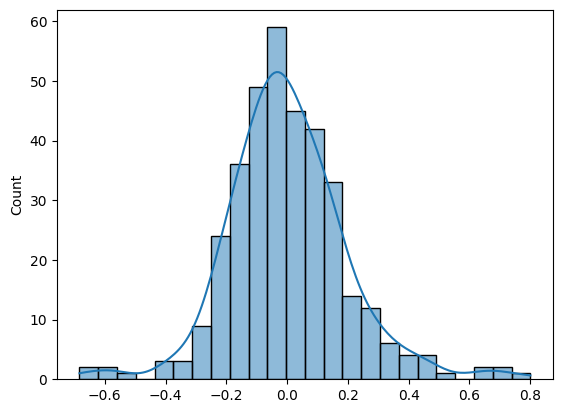

In [361]:
#To see if residual are normally distributed
sns.histplot(residuals,kde=True)

Residual are close to normal distribution.

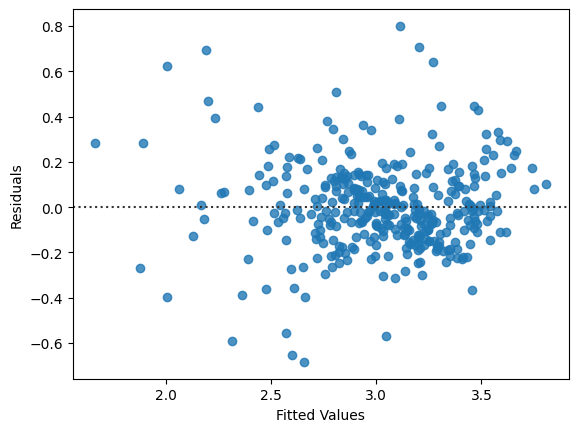

In [362]:
#To check linearity of variables, that is independent variables have a linear relation with target
sns.residplot(x=model1_0p3.fittedvalues,y=residuals)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.show()

There is no pattern in the residuals vs fitted values. There for linearity assumption is valid. We can expect homoscedascity as the residuals are almost  evenly distributed around the zero centered horizontal line

In [363]:
#To check heteroscedasticity
#Null hypothesis = Residual are homoscedasticity, residual are symmetrically distributed across the regression line
#Alternative hypothesis- Residual are hetroscedastic
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(residuals,x_train_scaled_1_0p3)
lzip(name, test)

[('F statistic', 1.0835082923425283), ('p-value', 0.3019012006766869)]

p value is greater than 0.05. Thus null hypothesis is valid, that is residuals are symmetrically distributed.

## Final Model

In [364]:
#The final mode is model5, obtained after dropping AGE, ZN, TAX and INDUS
print(model1_0p3.summary())
print("Train data")
print(model_performance_regression(model1_0p3,x_train_scaled_1_0p3,y_train_0p3))
print("-------------------------------------------------------------")
print("Test data")
print(model_performance_regression(model1_0p3,x_test_new_0p3,y_test_0p3))

                            OLS Regression Results                            
Dep. Variable:               MEDV_LOG   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     142.1
Date:                Fri, 29 Sep 2023   Prob (F-statistic):          2.61e-104
Time:                        15:09:39   Log-Likelihood:                 75.486
No. Observations:                 354   AIC:                            -133.0
Df Residuals:                     345   BIC:                            -98.15
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.7487      0.096     39.211      0.0

In [365]:
coefficients_model1_0p3=model1_0p3.params
print(coefficients_model1_0p3)
print("The model equation is","log(MEDV)=",round(coefficients_model1_0p3[0],4),"+")
for i in range(len(coefficients_model1_0p3)-1):
   print(round(coefficients_model1_0p3[i+1],4),'*',coefficients_model1_0p3.index[i+1],'+',end=' ')
print('\b\b\b')



const      3.748700
CRIM      -0.919131
CHAS       0.119773
NOX       -0.513326
RM         0.307433
DIS       -0.484621
RAD        0.180515
PTRATIO   -0.455934
LSTAT     -1.061000
dtype: float64
The model equation is log(MEDV)= 3.7487 +
-0.9191 * CRIM + 0.1198 * CHAS + -0.5133 * NOX + 0.3074 * RM + -0.4846 * DIS + 0.1805 * RAD + -0.4559 * PTRATIO + -1.061 * LSTAT + 


log(MEDV)=3.7487 + -0.9191 * CRIM + 0.1198 * CHAS + -0.5133 * NOX + 0.3074 * RM + -0.4846 * DIS + 0.1805 * RAD + -0.4559 * PTRATIO + -1.061 * LSTAT

The house price has highest correlation with LSTAT, and CRIME, which is negative

## Actionable Insights and Recommendations


###Insights

Based on the model, housing price is most effected by CRIM and LSTAT. As the proportion of lower economic group increases, the housing price decreases, probably people prefer lower priced affordable house.

As we saw from bivariate analysis, LSTAT is more at lower DIS, probably due to higher accessibility to all kind of jobs, including low paid jobs, due to the urban activities.

Pollution (NOX high --low air quality) and crime rate tend to negatively effect the price. If we see the crime rate, the number of houses in areas of higher crime rate are few, and their price is also high. They tend to lie in the outliers in the crime rate and MEDV.

CHAS has a weak positive correlation with housing price, but we need to be little skeptical about this, as we don't have much data points for housing sharing border with river. The house price is distributed between 10 and 30, for both CHAS=0 and CHAS=1.

Increase in number of rooms effect the housing price to increase. When the ratio of students to teachers is high (less educational resource) the housing price tend to decrease. Areas with lower pupil-teacher ratios may be allocating more resources towards education. This can be seen as an investment in the future of the community, and residents may be willing to pay more for homes in such areas.

Access to radial highways have weak positive correlation.

###Recommendations
Housing price can be increased if air quality is improved, PTRATIO is lower and crime rate is lower. People will be ready to invest in houses where quality of life will be better, like less pollution, more educational resources and more safety. Higher transportational network can improve the housing price, but at the same time NOX  should be less.

The R square we could achieve was 0.767 and MAPE 5% approximately. We need more data points for CHAS=1, and areas of high crime rate, to check for issues coming from few specific data points and  outliers. The relationship between independent and target need not be completely linear, may be we will have to use more complex or higher order polynomials. Multiplying some of the highly correlated independent variables, didn't seem to improve the model on trials. May be we need additional features to understand the housing price. This might improve the model performance.

-


___